# Лабораторная работа №306
## Температурная зависимость намагниченности

In [1]:
d = 20.2 # мм 
D = 29.8 # мм
h = 5.2 # мм
R1 = 62 # Ом
R2 = 25 # кОм
N1 = 300
N2 = 400
C = 2 # мкФ
Cx = 0.17 # В/дел
Cy = 0.02 # В/дел
S = h*(D-d)

### Упражнение 1. Получение петли гистерзиса и определение магнитных параметров образца при комнатной температуре

![glisteresis](C:\Users\дмитрий\Desktop\306\glisteresis.png)

Здесь:  
Hc = ОА - коэрцитивная сила  
Hs = OB - насыщающее поле  
Br = OC - остаточная индукция  
Bs = OD - индукция насыщения  

Рассчитаем значения коэрцитивной силы $H_c$, насыщающего поля $H_s$, остаточной индукции $B_r$, индукции насыщения образца $B_s$ по формулам:  
$$H=\frac{n_1C_xx}{R_1}$$  
$$B=\frac{R_2CC_yy}{N_2S_{obr}}$$  

Измеренные вкличины:


In [2]:
import pandas as pd
OA = 13 #дел
OB = 19 #дел
OC = 16 #дел
OD = 20 #дел
Sx = 0.05 #дел
Sy = 0.5 #дел
Hc = N1 * Cx * OA / R1 # А/м
HC = [Hc]
Hs = N1 * Cx * OB / R1 # А/м
HS = [Hs]
Br = 1000 * R2 * C * Cy * OC / (N2 * S) # Тл
BR = [Br]
Bs = 1000 * R2 * C * Cy * OD / (N2 * S) # Тл
BS = [Bs]
#Погрешности
SHc = 10 *  N1 * Cx * Sx / R1
SHs = SHc 
SBr = 1000 * R2 * C * Cy * Sy / (N2 * S)
SBs = SBr
SHC = [SHc]
SHS = [SHs]
SBR = [SBr]
SBS = [SBs]
data = pd.DataFrame({'Hc' : HC, 'Hs' : HS, 'Br' : BR, 'Bs' : BS}) 
data1 = pd.DataFrame({'\u00B1 SHc' : SHC,'    ' '\u00B1 SHs' : SHS, '    ' '\u00B1 SBr' : SBR, '   ''\u00B1 SBs' : SBS})
print(data, '\n', data1)


          Hc         Hs        Br        Bs
0  10.693548  15.629032  0.801282  1.001603 
      ± SHc      ± SHs      ± SBr     ± SBs
0  0.41129    0.41129    0.02504   0.02504


## Упражнение 2. Измерение зависимости индукции насыщения ферромагнитного образца от температуры и определение точки Кюри

Построить график зависимости $B_s$ от температуры $T$. Определить точку Кюри $T_c$.    

Запишем результаты измерения для температуры $T$ и $OD$.

In [3]:
import numpy as np
T = np.array([20, 30, 40, 48, 56, 70, 80, 90, 100, 105, 110, 115, 120, 125, 130, 132, 135, 138, 140]) 
sig_T = 5 #К
T += 273 # К
OD_arr = np.array([20, 18, 17.5, 16.5, 16, 15, 14, 13, 11.5, 10.5, 9.5, 7.5, 5.5, 3.5, 1.5, 0.5, 0.2, 0.1, 0])
OD_sig = 1 # дел
Bs_arr = 1000 * R2 * C * Cy * OD_arr / (N2 * S) # Тл
Bs_sig = 1000 * R2 * C * Cy * Sy / (N2 * S)
data = pd.DataFrame({'T' : T, 'sig_T' : sig_T, 'Bs' : Bs_arr, 'sig_Bs' : Bs_sig})
print(data)

      T  sig_T        Bs   sig_Bs
0   293      5  1.001603  0.02504
1   303      5  0.901442  0.02504
2   313      5  0.876402  0.02504
3   321      5  0.826322  0.02504
4   329      5  0.801282  0.02504
5   343      5  0.751202  0.02504
6   353      5  0.701122  0.02504
7   363      5  0.651042  0.02504
8   373      5  0.575921  0.02504
9   378      5  0.525841  0.02504
10  383      5  0.475761  0.02504
11  388      5  0.375601  0.02504
12  393      5  0.275441  0.02504
13  398      5  0.175280  0.02504
14  403      5  0.075120  0.02504
15  405      5  0.025040  0.02504
16  408      5  0.010016  0.02504
17  411      5  0.005008  0.02504
18  413      5  0.000000  0.02504


Построим график зависимости $B_s = f(T)$

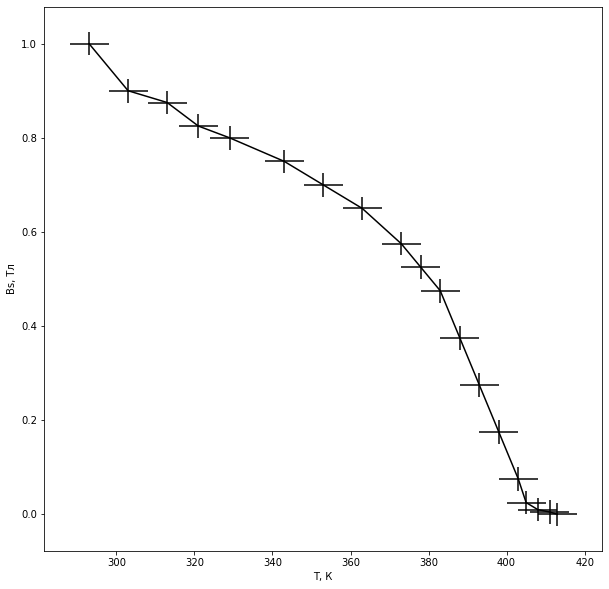

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.errorbar(T, Bs_arr, xerr=sig_T, yerr=Bs_sig, color='black')
plt.ylabel('Bs, Тл', color='black')
plt.xlabel('T, К', color='black')
plt.show()

### МНК:

In [5]:
from numpy import linalg as LA
Bs_mnk = Bs_arr[13:16]
T_mnk = T[13:16]
A = np.vstack([T_mnk, np.ones(len(T_mnk))]).T
a, b = np.linalg.lstsq(A, Bs_mnk, rcond=None)[0]
print(f'a = {a} Тл/К, b = {b} Тл/К')

a = -0.02118774654832347 Тл/К, b = 8.609287680802103 Тл/К


Формула температуры Кюри:
$$T_c=\frac{b}{a}$$

In [6]:
Tc = np.abs(b / a) - 273
print('Tc =',Tc,'градусов C')

Tc = 133.33333333333331 градусов C


# Основные итоги работы
Для комнатной температуры были получены значения коэрцитивной силы $H_c$, насыщающего поля $H_s$, остаточной индукции $B_r$ и индукции насыщения $B_s$:  
$$H_c = 10.6 +- 0.41 (В/см)$$
$$H_s = 15.5 +- 0.41 (В/см)$$ 
$$B_r = 0.4 +- 0.025 (В/см)$$
$$B_s = 0.5 +- 0.025 (В/см)$$  
При температуре Кюри феромагнетик становится парамагнетиком $T_c = (133,3 +- 0,5)(C)$